<a href="https://colab.research.google.com/github/NehaKumari500092077/Visual-Computing/blob/main/Assignment1_Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task 3: Image Rotation (3 Marks)
Rotate a given image by varying the angle of rotation between 0° – 180° in increments of 45°. Implement the rotation manually without using OpenCV's rotation functions. Verify the result using OpenCV. Use a_1_task_3.png as input.

radian  0


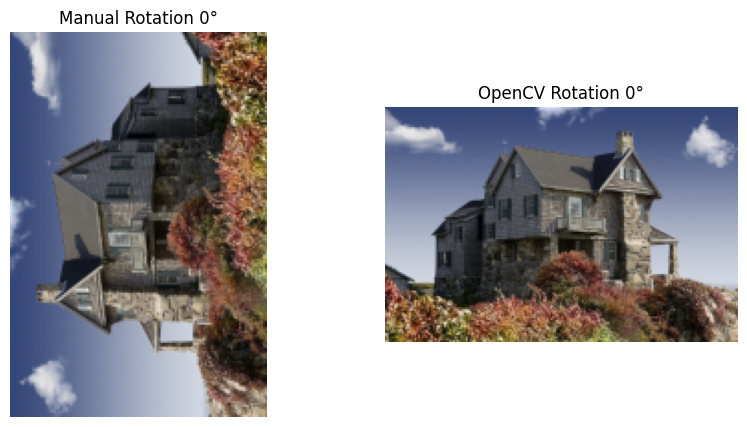

manually rotated image is not same as openCv rotated image result for 0 degree and mse is 105.1285400390625
radian  45


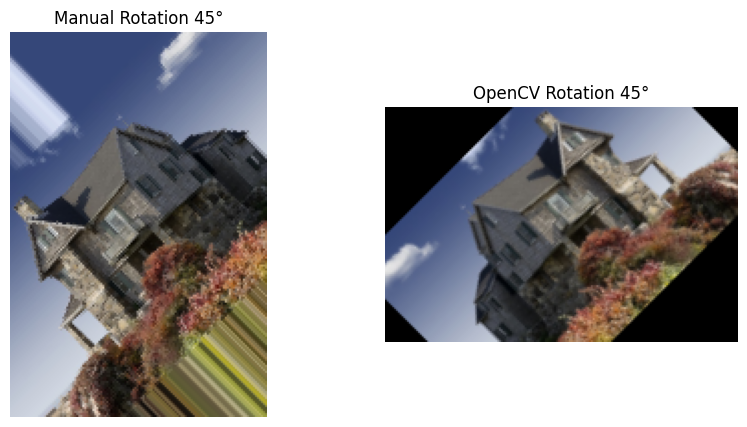

manually rotated image is not same as openCv rotated image result for 45 degree and mse is 103.79307725694444
radian  90


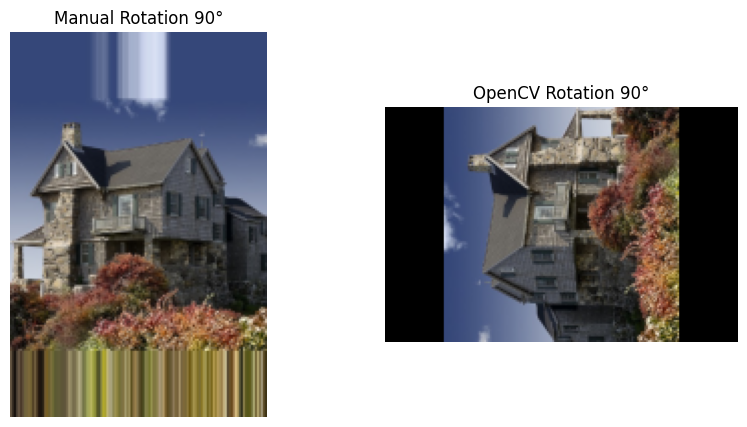

manually rotated image is not same as openCv rotated image result for 90 degree and mse is 108.00294325086806
radian  135


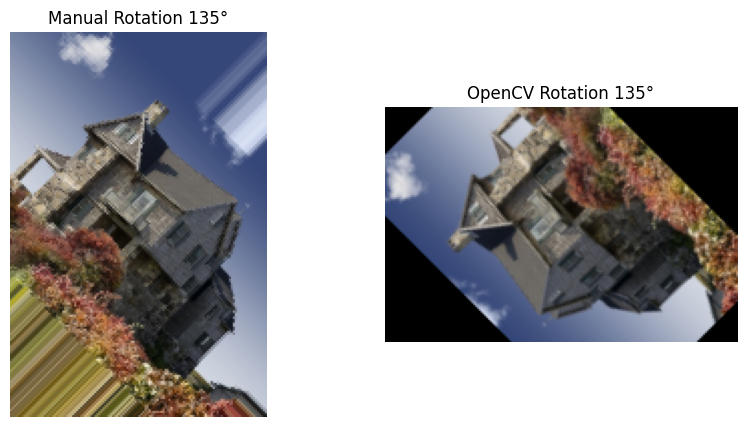

manually rotated image is not same as openCv rotated image result for 135 degree and mse is 105.43050130208333
radian  180


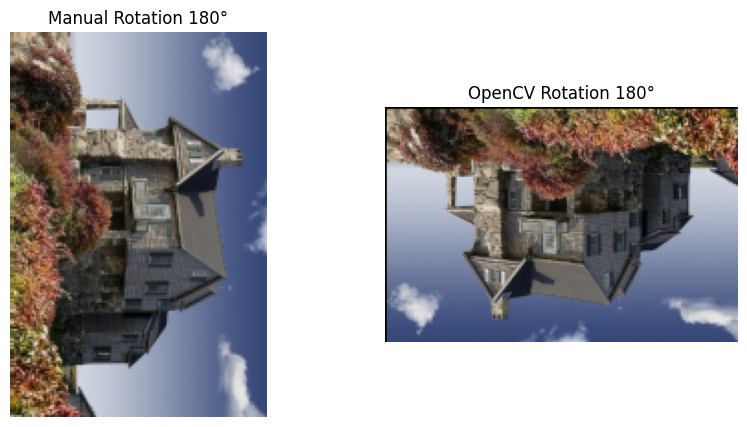

manually rotated image is not same as openCv rotated image result for 180 degree and mse is 105.23135036892361


In [50]:
import numpy as np
from PIL import Image
import cv2 as cv

def manual_rotation(image_path, angle):

  #load the input image
  input_image = Image.open(image_path).convert("RGB")

  #angle to radian conversion
  radian = np.deg2rad(angle)

  #dimension of image and center calculation
  input_image = np.array(input_image)
  height, width = input_image.shape[:2]
  x_center, y_center = width // 2, height // 2

  #cordinate of each pixel
  x, y = np.indices((width, height))

  #shift cordinates so that rotation performed around the origin
  x_shifted = x - x_center
  y_shifted = y - y_center

  #rotate the shifted coordinates using the rotation matrix
  x_rotated = x_shifted * np.cos(radian) - y_shifted * np.sin(radian)
  y_rotated = x_shifted * np.sin(radian) + y_shifted * np.cos(radian)

  #shift the rotated coordinates back to the original position
  x_rotated = np.round(x_rotated + x_center).astype(int)
  y_rotated = np.round(y_rotated + y_center).astype(int)

  #clip the cordinates within range of image indices
  x_rotated = np.clip(x_rotated, 0, width - 1)
  y_rotated = np.clip(y_rotated, 0, height - 1)

  #rotated image
  manually_rotated_image = input_image[y_rotated, x_rotated]

  return manually_rotated_image



def openCv_rotation(image_path, angle):

  #load the input image
  input_image = cv.imread(image_path)

  #convert BGR to RGB
  input_image = cv.cvtColor(input_image, cv.COLOR_BGR2RGB)

  #dimension of image and center calculation
  height, width = input_image.shape[:2]
  center = width // 2, height // 2


  # generate rotation matrix
  opencv_rotation_matrix = cv.getRotationMatrix2D(center, angle, 1.0)

  #rotate the image using rotation matrix
  opencv_rotated_image = cv.warpAffine(input_image, opencv_rotation_matrix, (width, height))

  return opencv_rotated_image




def verify_result(image1, image2):

  #compare the shape
  if(image1.shape != image2.shape):
    if(image1.shape[0] > image2.shape[0] and image1.shape[1] > image1.shape[1]):
      image1 = cv.resize(image1, (image2.shape[1], image2.shape[0]))
    else:
      image2 = cv.resize(image2, (image1.shape[1], image1.shape[0]))

  return np.mean((np.array(image1) - np.array(image2)) ** 2)



def show_images(image1, image2, title1="Manual Rotation", title2="OpenCV Rotation"):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title(title1)
    plt.imshow(image1)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title(title2)
    plt.imshow(image2)
    plt.axis('off')

    plt.show()



image_path = "/content/a_1_task_3.png"

# rotate image by [0, 45, 90, 135, 180]
angles = [0, 45, 90, 135, 180]
for angle in angles:

  #rotate image manually
  manual_rotation_image = manual_rotation(image_path, angle)

  #rotate image using openCv library
  openCv_rotation_image = openCv_rotation(image_path, angle)

  # Show images for visual comparison
  show_images(manual_rotation_image, openCv_rotation_image, f"Manual Rotation {angle}°", f"OpenCV Rotation {angle}°")

  #verify result of manually rotated image and openCv rotated image
  #using mean square error
  mse = verify_result(manual_rotation_image, openCv_rotation_image)
  if(mse < 1):
    print(f"manually rotated image is same as openCv rotated image result for {angle} degree and mse is {mse}")
  else:
    print(f"manually rotated image is not same as openCv rotated image result for {angle} degree and mse is {mse}")




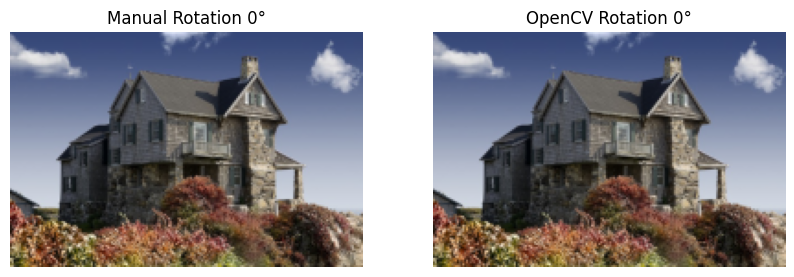

Manually rotated image is same as OpenCV rotated image result for 0 degrees and MSE is 0.0


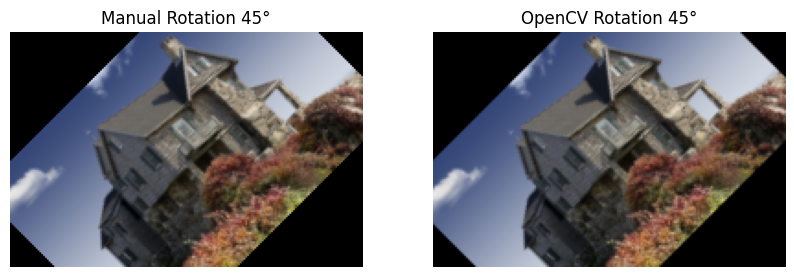

Manually rotated image is not same as OpenCV rotated image result for 45 degrees and MSE is 1.4368082682291667


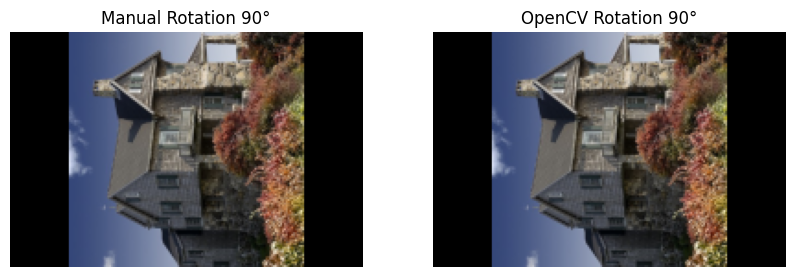

Manually rotated image is same as OpenCV rotated image result for 90 degrees and MSE is 0.0076904296875


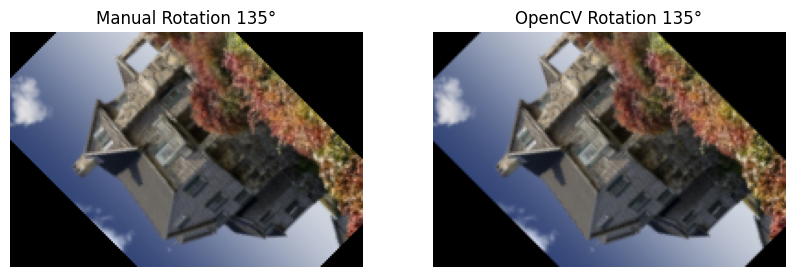

Manually rotated image is not same as OpenCV rotated image result for 135 degrees and MSE is 1.4234347873263888


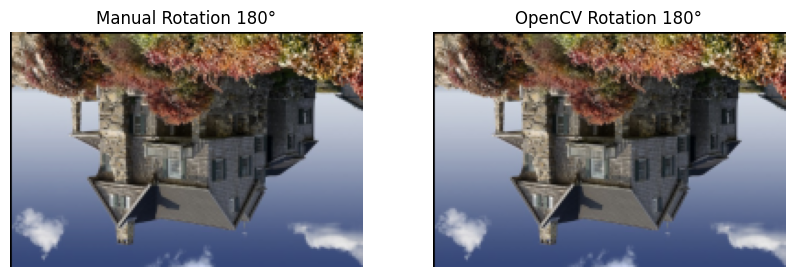

Manually rotated image is same as OpenCV rotated image result for 180 degrees and MSE is 0.19066026475694445


In [51]:
import numpy as np
from PIL import Image
import cv2 as cv

def bilinear_interpolation(image, x, y):
    x0 = np.floor(x).astype(int)
    x1 = np.ceil(x).astype(int)
    y0 = np.floor(y).astype(int)
    y1 = np.ceil(y).astype(int)

    # Clip the coordinates to be within the bounds of the image
    x0 = np.clip(x0, 0, image.shape[1] - 1)
    x1 = np.clip(x1, 0, image.shape[1] - 1)
    y0 = np.clip(y0, 0, image.shape[0] - 1)
    y1 = np.clip(y1, 0, image.shape[0] - 1)

    f00 = image[y0, x0]
    f01 = image[y0, x1]
    f10 = image[y1, x0]
    f11 = image[y1, x1]

    dx = x - x0
    dy = y - y0

    return (f00 * (1 - dx) * (1 - dy) +
            f01 * dx * (1 - dy) +
            f10 * (1 - dx) * dy +
            f11 * dx * dy).astype(np.uint8)

def manual_rotation(image_path, angle):
    # Load the input image
    input_image = Image.open(image_path).convert("RGB")
    input_image = np.array(input_image)

    # Angle to radian conversion
    radian = np.deg2rad(angle)

    # Dimension of image and center calculation
    height, width = input_image.shape[:2]
    x_center, y_center = width // 2, height // 2

    # Coordinate of each pixel
    y, x = np.indices((height, width))

    # Shift coordinates so that rotation performed around the origin
    x_shifted = x - x_center
    y_shifted = y - y_center

    # Rotate the shifted coordinates using the rotation matrix
    x_rotated = x_shifted * np.cos(radian) - y_shifted * np.sin(radian)
    y_rotated = x_shifted * np.sin(radian) + y_shifted * np.cos(radian)

    # Shift the rotated coordinates back to the original position
    x_rotated = x_rotated + x_center
    y_rotated = y_rotated + y_center

    # Interpolate pixel values
    manually_rotated_image = np.zeros_like(input_image)
    for i in range(height):
        for j in range(width):
            if 0 <= x_rotated[i, j] < width and 0 <= y_rotated[i, j] < height:
                manually_rotated_image[i, j] = bilinear_interpolation(input_image, x_rotated[i, j], y_rotated[i, j])

    return manually_rotated_image

def openCv_rotation(image_path, angle):
    # Load the input image as RGB
    input_image = cv.imread(image_path)
    input_image = cv.cvtColor(input_image, cv.COLOR_BGR2RGB)

    # Dimension of image and center calculation
    height, width = input_image.shape[:2]
    center = (width // 2, height // 2)

    # Generate rotation matrix
    opencv_rotation_matrix = cv.getRotationMatrix2D(center, angle, 1.0)

    # Rotate the image using rotation matrix
    opencv_rotated_image = cv.warpAffine(input_image, opencv_rotation_matrix, (width, height))

    return opencv_rotated_image

def verify_result(image1, image2):
    # Compare the shape
    if image1.shape != image2.shape:
        if image1.shape[0] > image2.shape[0] and image1.shape[1] > image2.shape[1]:
            image1 = cv.resize(image1, (image2.shape[1], image2.shape[0]))
        else:
            image2 = cv.resize(image2, (image1.shape[1], image1.shape[0]))

    return np.mean((np.array(image1) - np.array(image2)) ** 2)


def show_images(image1, image2, title1="Manual Rotation", title2="OpenCV Rotation"):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title(title1)
    plt.imshow(image1)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title(title2)
    plt.imshow(image2)
    plt.axis('off')

    plt.show()



image_path = "/content/a_1_task_3.png"

# Rotate image by [0, 45, 90, 135, 180]
angles = [0, 45, 90, 135, 180]
for angle in angles:
    # Rotate image manually
    manual_rotation_image = manual_rotation(image_path, angle)

    # Rotate image using OpenCV library
    openCv_rotation_image = openCv_rotation(image_path, angle)

    # Show images for visual comparison
    show_images(manual_rotation_image, openCv_rotation_image, f"Manual Rotation {angle}°", f"OpenCV Rotation {angle}°")


    # Verify result of manually rotated image and OpenCV rotated image
    mse = verify_result(manual_rotation_image, openCv_rotation_image)
    if mse < 1:
        print(f"Manually rotated image is same as OpenCV rotated image result for {angle} degrees and MSE is {mse}")
    else:
        print(f"Manually rotated image is not same as OpenCV rotated image result for {angle} degrees and MSE is {mse}")
